In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./results.csv') # matches results dataframe
fifa_ranking_df = pd.read_csv('./fifa_ranking.csv') # FIFA ranking dataframe

# Cleaning matches results
df.drop(['city', 'country', 'neutral'], axis=1, inplace=True)
df = df[df.tournament != 'Friendly']
print(df.shape)
df.head()

(25348, 6)


,date,home_team,away_team,home_score,away_score,tournament
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship
31,1884-02-23,Northern Ireland,England,1,8,British Championship
32,1884-03-15,Scotland,England,1,0,British Championship
33,1884-03-17,Wales,England,0,4,British Championship


In [2]:
# Cleaning FIFA ranking
fifa_ranking_df.drop(['country_abrv', 'previous_points', 'rank_change'], axis=1, inplace=True)
print(fifa_ranking_df.shape)
fifa_ranking_df.head()

(63054, 6)


,id,rank,country_full,total_points,confederation,rank_date
0,43818,82,Iraq,15,AFC,1992-12-31
1,43873,107,Mozambique,9,CAF,1992-12-31
2,43816,108,Indonesia,9,AFC,1992-12-31
3,1882218,109,Antigua and Barbuda,8,CONCACAF,1992-12-31
4,43820,110,Jordan,8,AFC,1992-12-31


In [3]:
# Choosing recent matches because the FIFA ranking starts at 1993/8/8
recent_matches = df.loc[(df['date'] >= "1993-8-8")]
print(recent_matches.shape)
recent_matches.head()

(15802, 6)


,date,home_team,away_team,home_score,away_score,tournament
18135,1994-01-19,Suriname,French Guiana,1,0,CFU Caribbean Cup qualification
18137,1994-01-21,Guyana,French Guiana,1,1,CFU Caribbean Cup qualification
18139,1994-01-23,Barbados,Puerto Rico,0,1,CFU Caribbean Cup qualification
18142,1994-01-23,Suriname,Guyana,2,0,CFU Caribbean Cup qualification
18143,1994-01-25,Grenada,Puerto Rico,1,0,CFU Caribbean Cup qualification


In [4]:
# Choosing only competitive tournaments
comp_tournaments = ['FIFA World Cup', 'FIFA World Cup qualification', 'UEFA Euro', 'UEFA Euro qualification', 'AFC Asian Cup', 
                       'AFC Asian Cup qualification', 'African Cup of Nations', 'African Cup of Nations qualification',
                       'CONCACAF Championship', 'CONCACAF Championship qualification', 'Copa América', 
                       'Copa América qualification', 'Oceania Nations Cup', 'Oceania Nations Cup qualification']

comp_matches = recent_matches.loc[recent_matches['tournament'].isin(comp_tournaments)]
print(comp_matches.shape)
comp_matches.head()

(10436, 6)


,date,home_team,away_team,home_score,away_score,tournament
18233,1994-03-26,Nigeria,Gabon,3,0,African Cup of Nations
18235,1994-03-26,Tunisia,Mali,0,2,African Cup of Nations
18237,1994-03-27,Ghana,Guinea,1,0,African Cup of Nations
18238,1994-03-27,Ivory Coast,Sierra Leone,4,0,African Cup of Nations
18239,1994-03-28,Egypt,Gabon,4,0,African Cup of Nations


In [5]:
# Checking the difference in teams names between the two dataframes
comp_matches_list = comp_matches.home_team.unique()
fifa_ranking_df_list = fifa_ranking_df.country_full.unique()

notFoundCountries = list(set(comp_matches_list) - set(fifa_ranking_df_list))
print(notFoundCountries)

['United States', 'Burma', 'North Korea', 'Iran', 'Brunei', 'Saint Lucia', 'Cape Verde', 'Kyrgyzstan', 'United States Virgin Islands', 'Ivory Coast', 'South Korea', 'Taiwan', 'East Timor', 'DR Congo', 'Saint Vincent and the Grenadines', 'Saint Kitts and Nevis', 'Eswatini']


In [6]:
# Making dictionary to change the conflicted names in FIFA ranking
replacement_mapping_dict = {
    "St. Lucia": "Saint Lucia",
    "Chinese Taipei": "Taiwan",
    "USA": "United States",
    "Côte d'Ivoire": "Ivory Coast",
    "Korea Republic": "South Korea",
    "St. Vincent / Grenadines": "Saint Vincent and the Grenadines",
    "Timor-Leste": "East Timor",
    "Korea DPR": "North Korea",
    "Cabo Verde": "Cape Verde",
    "Brunei Darussalam": "Brunei",
    "Kyrgyz Republic": "Kyrgyzstan",
    "IR Iran": "Iran",
    "Congo DR": "DR Congo",
    "Zaire": "DR Congo",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "Swaziland": "Eswatini",
    "US Virgin Islands": "United States Virgin Islands"
}

Myanmar_dict = {
    "Burma": "Myanmar"
}

final_ranking = fifa_ranking_df
final_ranking.replace({"country_full": replacement_mapping_dict},inplace=True)
final_matches = comp_matches

In [7]:
# Droping some team matches because they don't have rank in FIFA ranking.
# I know it's bad practise and I should create a list, but I didn't have time 
temp = final_matches.drop(final_matches[(final_matches['home_team'] == "Papua New Guinea") & (final_matches['date'] < "1996-09-25")].index)
temp1 = temp.drop(temp[(temp['away_team'] == "Papua New Guinea") & (temp['date'] < "1996-09-25")].index)
temp2 = temp1.drop(temp1[(temp1['home_team'] == "New Caledonia") & (temp1['date'] < "2004-06-09")].index)
temp13 = temp2.drop(temp2[(temp2['away_team'] == "New Caledonia") & (temp2['date'] < "2004-06-09")].index)
temp14 = temp13.drop(temp13[(temp13['home_team'] == "American Samoa") & (temp13['date'] < "1998-10-21")].index)
temp15 = temp14.drop(temp14[(temp14['away_team'] == "American Samoa") & (temp14['date'] < "1998-10-21")].index)
temp16 = temp15.drop(temp15[(temp15['home_team'] == "Tonga") & (temp15['date'] < "1996-11-20")].index)
temp17 = temp16.drop(temp16[(temp16['away_team'] == "Tonga") & (temp16['date'] < "1996-11-20")].index)
temp18 = temp17.drop(temp17[(temp17['home_team'] == "Samoa") & (temp17['date'] < "1996-11-20")].index)
temp19 = temp18.drop(temp18[(temp18['away_team'] == "Samoa") & (temp18['date'] < "1996-11-20")].index)
temp19 = temp19[(temp19.home_team != "Serbia") & (temp19.away_team != "Serbia")]
temp19 = temp19[(temp19.home_team != "Curaçao") & (temp19.away_team != "Curaçao")]
temp19 = temp19[(temp19.home_team != "Burma") & (temp19.away_team != "Burma")]
temp19 = temp19[(temp19.home_team != "Guam") & (temp19.away_team != "Guam")]
temp19 = temp19[(temp19.home_team != "São Tomé and Príncipe") & (temp19.away_team != "São Tomé and Príncipe")]
temp19 = temp19[(temp19.home_team != "Eritrea") & (temp19.away_team != "Eritrea")]
temp19 = temp19[(temp19.home_team != "Bhutan") & (temp19.away_team != "Bhutan")]
temp19 = temp19[(temp19.home_team != "East Timor") & (temp19.away_team != "East Timor")]
temp19 = temp19[(temp19.home_team != "Gibraltar") & (temp19.away_team != "Gibraltar")]
temp19 = temp19[(temp19.home_team != "Timor-Leste") & (temp19.away_team != "Timor-Leste")]
print(temp19.shape)

(10017, 6)


In [8]:
# Checking the difference in teams names between the two dataframes
# Again
final_matches = temp19

final_matches_list = final_matches.home_team.unique()
final_ranking_list = final_ranking.country_full.unique()

temp3 = [item for item in final_matches_list if item not in final_ranking_list]
print(temp3)
print(final_matches.loc[(final_matches['home_team'] == "Burma")])

[]
Empty DataFrame
Columns: [date, home_team, away_team, home_score, away_score, tournament]
Index: []


In [9]:
# Loop through each match and store the winner, the looser, ranks, if the higher team won and the rank difference in 
# new dataframe called q1_df
# NOTE: this code may take 5-10 minutes to run XD
fifa_ranking_df = final_ranking

q1_df = pd.DataFrame(columns = ["winner", "loser", "winnerRank", "loserRank", "higherWon", "rankDif"])

for index, row in final_matches.iterrows():
    if row["home_score"] > row["away_score"]:
        winner = row["home_team"]
        loser = row["away_team"]
        # Getting the winner and loser rows from FIFA ranking dataframe
        winnerRankRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == winner) & (fifa_ranking_df['rank_date'] <= row["date"])]
        loserRankRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == loser) & (fifa_ranking_df['rank_date'] <= row["date"])]
    elif row["home_score"] < row["away_score"]:
        winner = row["away_team"]
        loser = row["home_team"]
        # Getting the winner and loser rows from FIFA ranking dataframe
        winnerRankRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == winner) & (fifa_ranking_df['rank_date'] <= row["date"])]
        loserRankRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == loser) & (fifa_ranking_df['rank_date'] <= row["date"])]
    else:
        # If it's draw we will skip
        continue
        
    print(winnerRankRow["country_full"].values[0])
    print(row["date"])
    print(loserRankRow["country_full"].values[0])
    
    # Checking if the winner has better rank, and store 1 in isHigher if it is true
    # Also calculating the rank difference
    if winnerRankRow["rank"].values[0] < loserRankRow["rank"].values[0]:
        isHigher = 1
        rankDif = loserRankRow["rank"].values[0] - winnerRankRow["rank"].values[0]
    else:
        isHigher = 0
        rankDif = winnerRankRow["rank"].values[0] - loserRankRow["rank"].values[0]
        
        
    q1_df.loc[q1_df.shape[0]] = [winner, loser, winnerRankRow["rank"].values[0], loserRankRow["rank"].values[0], isHigher, rankDif]

q1_df.head()

'''winner = "Algeria"
match_date = "1993-01-10"
winnerRankRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == winner) & (fifa_ranking_df['rank_date'] <= match_date)]
print(rankRow["rank"])'''

Nigeria
1994-03-26
Gabon
Mali
1994-03-26
Tunisia
Ghana
1994-03-27
Guinea
Ivory Coast
1994-03-27
Sierra Leone
Egypt
1994-03-28
Gabon
DR Congo
1994-03-28
Mali
Senegal
1994-03-29
Guinea
Ghana
1994-03-31
Senegal
Zambia
1994-03-31
Ivory Coast
Nigeria
1994-04-02
DR Congo
Mali
1994-04-02
Egypt
Ivory Coast
1994-04-03
Ghana
Zambia
1994-04-03
Senegal
Zambia
1994-04-06
Mali
Ivory Coast
1994-04-10
Mali
Nigeria
1994-04-10
Zambia
Northern Ireland
1994-04-20
Liechtenstein
Germany
1994-06-17
Bolivia
Romania
1994-06-18
Colombia
Republic of Ireland
1994-06-18
Italy
Belgium
1994-06-19
Morocco
Norway
1994-06-19
Mexico
Brazil
1994-06-20
Russia
Netherlands
1994-06-20
Saudi Arabia
Argentina
1994-06-21
Greece
Nigeria
1994-06-21
Bulgaria
Switzerland
1994-06-22
Romania
United States
1994-06-22
Colombia
Italy
1994-06-23
Norway
Brazil
1994-06-24
Cameroon
Mexico
1994-06-24
Republic of Ireland
Sweden
1994-06-24
Russia
Argentina
1994-06-25
Nigeria
Belgium
1994-06-25
Netherlands
Saudi Arabia
1994-06-25
Morocco
Bulgar

'winner = "Algeria"\nmatch_date = "1993-01-10"\nwinnerRankRow = fifa_ranking_df.loc[(fifa_ranking_df[\'country_full\'] == winner) & (fifa_ranking_df[\'rank_date\'] <= match_date)]\nprint(rankRow["rank"])'

In [10]:
print(q1_df.shape)
q1_df.head()

(7849, 6)


,winner,loser,winnerRank,loserRank,higherWon,rankDif
0,Nigeria,Gabon,13,55,1,42
1,Mali,Tunisia,69,38,0,31
2,Ghana,Guinea,39,63,1,24
3,Ivory Coast,Sierra Leone,27,79,1,52
4,Egypt,Gabon,21,55,1,34


In [11]:
# Divide the results to 6 bins and store the count matches and sum of isHigher columns in perc_df
bins = pd.cut(q1_df['rankDif'], [1, 10, 25, 50, 100, 250])
perc_df = q1_df.groupby(bins).agg({'rankDif': ['count'], 'higherWon': ['sum']})
perc_df

,rankDif,higherWon
,count,sum
rankDif,,
"(1, 10]",874,480
"(10, 25]",1461,908
"(25, 50]",1799,1252
"(50, 100]",2248,1770
"(100, 250]",1359,1198


In [12]:
# Calculating the percentage
perc_df['%_isHigher'] = perc_df.loc[:, [('higherWon', 'sum')]].values / perc_df.loc[:, [('rankDif', 'count')]].values * 100
perc_df

,rankDif,higherWon,%_isHigher
,count,sum,
rankDif,,,
"(1, 10]",874,480,54.919908
"(10, 25]",1461,908,62.149213
"(25, 50]",1799,1252,69.594219
"(50, 100]",2248,1770,78.736655
"(100, 250]",1359,1198,88.153054


Text(0,0.5,'Win rate')

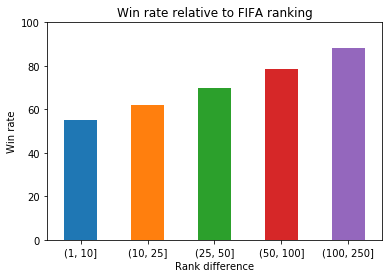

In [13]:
ax = perc_df.plot.bar(y = '%_isHigher', rot=0, title = "Win rate relative to FIFA ranking", ylim=(0,100), legend=False)
ax.set_xlabel("Rank difference")
ax.set_ylabel("Win rate")

In [14]:
'''fig = ax.get_figure()
fig.savefig('Q1.eps', format='eps')'''

"fig = ax.get_figure()\nfig.savefig('Q1.eps', format='eps')"

In [15]:
# Choosing only World Cup matches
world_cup_df = df.loc[df['tournament'] == 'FIFA World Cup']

world_cup_df = world_cup_df[(world_cup_df.home_team != "German DR") & (world_cup_df.away_team != "German DR")]

print(world_cup_df.shape)
world_cup_df.head()

(894, 6)


,date,home_team,away_team,home_score,away_score,tournament
1314,1930-07-13,Belgium,United States,0,3,FIFA World Cup
1315,1930-07-13,France,Mexico,4,1,FIFA World Cup
1316,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup
1317,1930-07-14,Peru,Romania,1,3,FIFA World Cup
1318,1930-07-15,Argentina,France,1,0,FIFA World Cup


In [16]:
confed = pd.DataFrame(columns = ["Confederation", "Count", "Winner"])
confed

,Confederation,Count,Winner


In [17]:
# This loop will store the team name and confederation in new dataframe
for index, row in world_cup_df.iterrows():
    if row["home_score"] > row["away_score"]:
        winner = row["home_team"]
        winnerRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == winner)]
        winnerConfederation = winnerRow["confederation"].values[0]
    elif row["home_score"] < row["away_score"]:
        winner = row["away_team"]
        winnerRow = fifa_ranking_df.loc[(fifa_ranking_df['country_full'] == winner)]
        winnerConfederation = winnerRow["confederation"].values[0]
    else:
        continue
    
    print(winnerRow["country_full"].values[0])
    print(row["date"])
    
    confed.loc[confed.shape[0]] = [winnerConfederation, 1, winnerRow["country_full"].values[0]]

United States
1930-07-13
France
1930-07-13
Yugoslavia
1930-07-14
Romania
1930-07-14
Argentina
1930-07-15
Chile
1930-07-16
Yugoslavia
1930-07-17
United States
1930-07-17
Uruguay
1930-07-18
Argentina
1930-07-19
Chile
1930-07-19
Paraguay
1930-07-20
Brazil
1930-07-20
Uruguay
1930-07-21
Argentina
1930-07-22
Argentina
1930-07-26
Uruguay
1930-07-27
Uruguay
1930-07-30
Sweden
1934-05-27
Austria
1934-05-27
Germany
1934-05-27
Spain
1934-05-27
Czechoslovakia
1934-05-27
Hungary
1934-05-27
Italy
1934-05-27
Switzerland
1934-05-27
Austria
1934-05-31
Czechoslovakia
1934-05-31
Germany
1934-05-31
Italy
1934-06-01
Czechoslovakia
1934-06-03
Italy
1934-06-03
Germany
1934-06-07
Italy
1934-06-10
Brazil
1938-06-05
Czechoslovakia
1938-06-05
France
1938-06-05
Hungary
1938-06-05
Italy
1938-06-05
Cuba
1938-06-09
Switzerland
1938-06-09
Sweden
1938-06-12
Italy
1938-06-12
Hungary
1938-06-12
Brazil
1938-06-14
Italy
1938-06-16
Hungary
1938-06-16
Brazil
1938-06-19
Italy
1938-06-19
Brazil
1950-06-24
England
1950-06-25
Sw

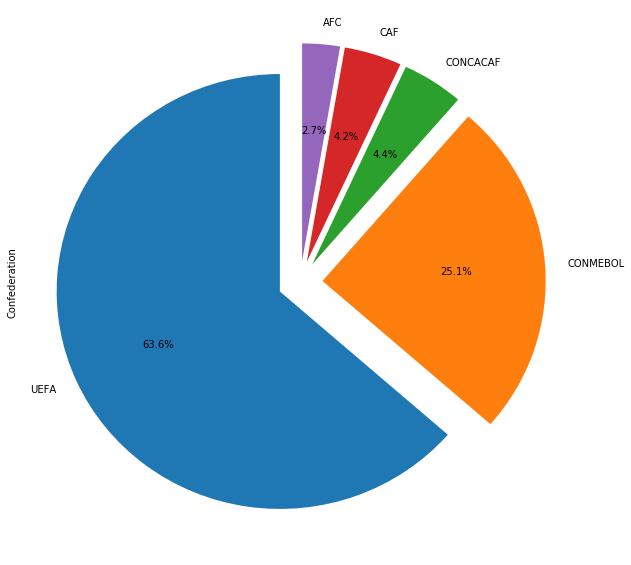

In [18]:
confed_sum = confed['Confederation'].value_counts()
ax2 = confed_sum.plot.pie(subplots=True, figsize=(10, 10), shadow=False, startangle=90, autopct='%1.1f%%', explode=(0.1, 0.1, 0.1, 0.1, 0.1))

In [19]:
'''fig = ax2[0].get_figure()
fig.savefig('Q2.eps', format='eps')'''

"fig = ax2[0].get_figure()\nfig.savefig('Q2.eps', format='eps')"

In [20]:
winner_sum = confed['Winner'].value_counts()
winner_sum

Brazil                    72
Germany                   67
Italy                     45
Argentina                 43
France                    34
Spain                     30
England                   29
Netherlands               26
Uruguay                   24
Belgium                   20
Sweden                    19
Russia                    19
Poland                    16
Mexico                    16
Hungary                   15
Yugoslavia                14
Portugal                  14
Switzerland               12
Austria                   12
Czechoslovakia            11
Chile                     11
Croatia                   11
Denmark                    9
Colombia                   9
United States              8
Romania                    8
Paraguay                   7
Nigeria                    6
South Korea                6
Costa Rica                 5
                          ..
Japan                      5
Peru                       5
Scotland                   4
Ecuador       

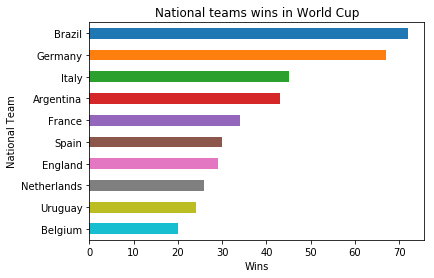

In [21]:
ax3 = winner_sum[:10].plot.barh(rot=0, title = "National teams wins in World Cup", legend=False)
ax3.set_xlabel("Wins")
ax3.set_ylabel("National Team")
ax3.invert_yaxis()

In [22]:
fig = ax3.get_figure()
fig.savefig('Q3.eps', format='eps')